In [1]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

config = configparser.ConfigParser()
config.read('config.ini')
username = config['mariadb']['username']
password = config['mariadb']['password']
database = config['mariadb']['database']
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

In [2]:
sql = '''
SELECT *
FROM grantaward
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_institution USING (institution_niicode)
WHERE grantaward.startfiscalyear >= 2009
AND grantaward.category_niicode = 65
'''
df = pd.read_sql_query(sql, engine)

In [3]:
pivot = pd.crosstab(df['category_name'], df['startfiscalyear'])
pivot

startfiscalyear,2014,2015,2016,2017
category_name,,,,
若手研究(B),5886,5745,5735,5817


Text(0,0.5,'採択件数')

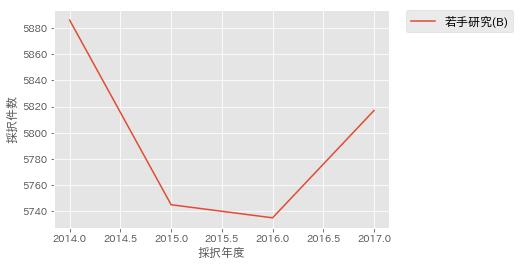

In [4]:
pivot = pivot.T
pivot.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.xlabel("採択年度")
plt.ylabel("採択件数")

In [5]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2014 to 2017
Data columns (total 1 columns):
若手研究(B)    4 non-null int64
dtypes: int64(1)
memory usage: 224.0 bytes


In [6]:
teidaicode = [10101, 11301, 12601, 13901, 14301, 14401, 17102, 15301, 13101, 23903, 22701, 24402]
teidai = df[df['institution_niicode'].isin(teidaicode)]
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2017, ascending=False)
pivot

startfiscalyear,2014,2015,2016,2017
institution_name,,,,
東京大学,296,305,263,297
東北大学,184,184,159,210
大阪大学,216,203,181,204
京都大学,212,196,208,173
九州大学,141,145,137,157
名古屋大学,128,112,134,119
北海道大学,124,110,144,112
岡山大学,62,86,66,70
新潟大学,64,62,69,54


(0, 319.15)

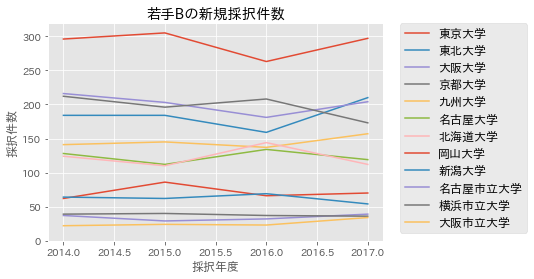

In [8]:
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2017, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('若手Bの新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)